## <center> Computer Vision </center>
#### <center> Assignment-3 </center>
<center> Submitted by Anjali Singh, 2020102004 </center>

In [2]:
import numpy as np
import cv2
import os
import pandas as pd  
import matplotlib.pyplot as plt

### Q1: Face Detection & Association-based tracking 

#### part-1

In [3]:
import subprocess as sp

In [4]:
import os

output_folder = os.path.join(".", "forrest-2") # '.\forrest-2'
input_path = os.path.join(".", "forrest-gump-2.mp4")

In [5]:
!mkdir {output_folder}

A subdirectory or file .\forrest-2 already exists.


In [6]:
output_path = os.path.join(output_folder, "frame_%03d.png")

!ffmpeg -t 30 -i {input_path} {output_path}

ffmpeg version N-114701-g2d79ae3f8a-20240407 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 13.2.0 (crosstool-NG 1.26.0.65_ecc5e41)
  configuration: --prefix=/ffbuild/prefix --pkg-config-flags=--static --pkg-config=pkg-config --cross-prefix=x86_64-w64-mingw32- --arch=x86_64 --target-os=mingw32 --enable-gpl --enable-version3 --disable-debug --disable-w32threads --enable-pthreads --enable-iconv --enable-libxml2 --enable-zlib --enable-libfreetype --enable-libfribidi --enable-gmp --enable-fontconfig --enable-libharfbuzz --enable-libvorbis --enable-opencl --disable-libpulse --enable-libvmaf --disable-libxcb --disable-xlib --enable-amf --enable-libaom --enable-libaribb24 --enable-avisynth --enable-chromaprint --enable-libdav1d --enable-libdavs2 --enable-libdvdread --enable-libdvdnav --disable-libfdk-aac --enable-ffnvcodec --enable-cuda-llvm --enable-frei0r --enable-libgme --enable-libkvazaar --enable-libaribcaption --enable-libass --enable-libbluray --enable-libjxl --enable-l

In [ ]:
# Data Preparation
# Burst the first 30 secs into frames 

def convert_vid_to_frames(output_path, input_path):
    vid = cv2.VideoCapture(input_path)
    vid.set(cv2.CAP_PROP_FPS, 240)

    # create a folder to store the images
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    # extract the frames
    currentframe = 0
    while(True):
        # read from frame
        ret, frame = vid.read()

        if not ret:
            break

        # if video is still left continue creating images
        # using module os

        name = f"frame_{currentframe:03d}.jpg" 
        # print('Creating...' + name)

        # saving the extracted images to output path
        cv2.imwrite(os.path.join(output_path, name), frame)
        # cv2.imwrite(name, frame)

        # increase counter so that it will show how many frames are created
        currentframe += 1
    

In [ ]:
# convert_vid_to_frames(output_path=output_folder, input_path=input_path)


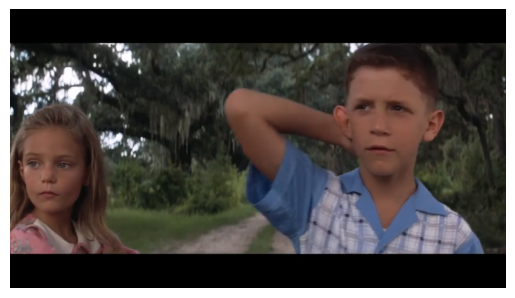

In [7]:
original = cv2.imread("./forrest-2/frame_100.png")

plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

#### part-2

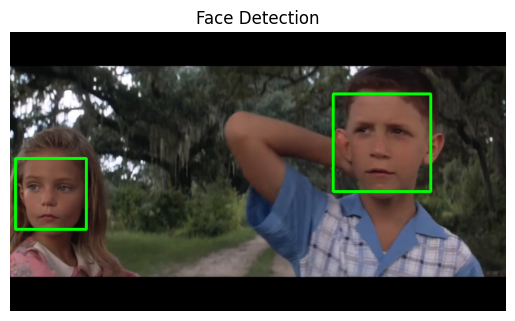

In [ ]:
grayscale = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + './haarcascade_frontalface_default.xml') 

# detect faces in the image
detected_faces = face_cascade.detectMultiScale(grayscale, scaleFactor = 1.1, minNeighbors = 9)
for (column, row, width, height) in detected_faces:
    original = cv2.rectangle(original, (column, row), (column+width, row+height), (0, 255, 0), thickness = 4)    

original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

plt.imshow(original_rgb)
plt.title("Face Detection")
plt.axis("off")
plt.show()

In [24]:
folder_path = os.path.join('.', 'forrest-2')
detected_path = os.path.join('.', 'forrest_detected')

def viola_jones(input_path, output_path):

    if not os.path.exists(output_path):
            os.makedirs(output_path)

    currentframe = 0
    for filename in os.listdir(input_path):
        if filename.endswith('.png'):
            img = cv2.imread(os.path.join(input_path, filename))

            # try:
            grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # except Exception as err:
            #     print(f'file: {os.path.join(input_path, filename)}')
            #     print(f'img: {img.shape}')
            #     raise err

            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + './haarcascade_frontalface_default.xml') 

            # detect faces in the image
            detected_faces = face_cascade.detectMultiScale(grayscale, scaleFactor = 1.1, minNeighbors = 9)
            for (column, row, width, height) in detected_faces:
                img = cv2.rectangle(img, (column, row), (column+width, row+height), (0, 255, 0), thickness = 4)    

            # original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            name = f"frame_{currentframe:03d}.png"
            cv2.imwrite(os.path.join(output_path , name), img)
            currentframe += 1
            # cv2.imshow('Detected faces', original) 
            cv2.waitKey(0) 
            # plt.imshow(original_rgb)
            # plt.title("Face Detection")
            # plt.axis("off")
            # plt.show()

In [38]:
# applying viola_jones() on one frame
# viola_jones(folder_path, detected_path)
# folder_path = os.path.join('.', 'forrest-2')
# detected_path = os.path.join('.', 'forrest_detected')
# input_frame = "./forrest-2/frame_002.png"
# detected_frame = os.path.join('.', 'forrest_detected_single_frame')
# viola_jones(input_frame, detected_frame)

In [37]:
viola_jones(folder_path, detected_path)

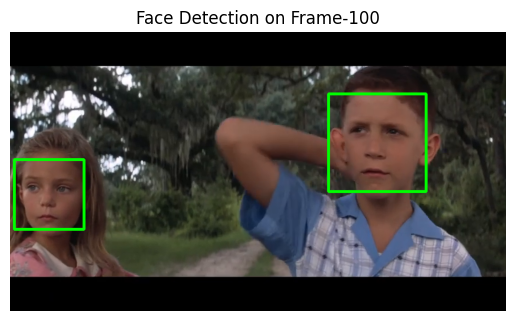

In [29]:
face_detected_frame = cv2.imread("./forrest_detected/frame_100.png")
plt.imshow(cv2.cvtColor(face_detected_frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Face Detection on Frame-100")
plt.show()

<b> How long does it take to process each frame? Identify some key factors of the algorithm that could change the time. </b><br>
<br>
It takes about 0.085 seconds to process each frame. <br>
Some key factors of the algorithm that could change the time are:-
- The algorithm searches for objects within a sliding window across the image. Its size can affect the number of potential locations to examine. 
- The detection parameters used for face detection- the scale factor, minNeighbours, can influence the processing time. Lowering the scaleFactor or increasing minNeighbors may lead to longer execution times but potentially more accurate detections.
- Drawing rectangles around detected faces (cv2.rectangle) involves iterating over each detected face and drawing a rectangle, which adds to the overall execution time.

#### part-3

Stitching of all the frames into one video using ffmpeg

In [26]:
face_detected_folder_path = os.path.join(".", "forrest_detected")
detected_frames_path = os.path.join(face_detected_folder_path, "frame_%03d.png")

# !ffmpeg -r 24 -f image2 -s 640x480 -i {detected_frames_path} -vcodec libx264 -crf 25  -pix_fmt yuv420p face_detected_forrest.mp4
!ffmpeg -framerate 24 -y -threads 16 -i {face_detected_folder_path}/frame_%03d.png -profile:v baseline -level 3.0 -c:v libx264 -pix_fmt yuv420p -an -v error face_detected_forrest-1.mp4

<b> Visualize the face detections made over the first 30s frames as a new
video. Link to the video from your google drive. 
Watch the video and draw three conclusions about when does the face detector work or fail. Why do you think this is the case? </b> <br><br>

The three conclusions about when the face detector works or not: - 
- In most of the frames where the eyes are clearly visible, the detector works completely fine. 
    - This could be because the algo relies on Haar-like features-like eyes, nose, mouth, based on intensity variations in the image. 
    - So, when the eyes are visible and well-illuminated, the algorithm can effectively detect these features. 
- If the person is facing backside, the algorithm doesn't work. 
    - The algorithm is designed to detect frontal faces based on predefined features, such as the arrangement of eyes, nose, and mouth.
    - When a person is facing the backside, these features may not be visible or may not match the expected patterns, leading to detection failure.
- If the eyes are closed or/and the person is far from the camera, the detector might fail to detect the faces in such cases. 
    - Occluded facial features can disrupt the patterns that the algorithm looks for, leading to detection failures.
    - Similarly, if the person is far from the camera, facial features may appear smaller and less distinct, making it harder for the algorithm to detect them accurately.

#### part-4

##### (i)

In [9]:
def calculate_iou(boxA, boxB):
    # Calculate the Intersection over Union (IoU) of two bounding boxes
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)

    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]

    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

In [ ]:
# def track_faces(input_path, output_path, scaleFactor=1.1, minNeighbors=20, max_frames=10):
#     tracks = []  # Dictionary to store active tracks
#     track_id = 0  # Counter to assign unique track IDs
#     current_frame = 0

#     arr_frames = [cv2.imread(os.path.join(input_path, filename)) for filename in os.listdir(input_path) if filename.endswith('.png')]

#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + './haarcascade_frontalface_default.xml')

#     for idx, frame in enumerate(arr_frames):
#         if current_frame == max_frames:
#             break

#         print(f'==============')
#         print(f'frame: {idx:03d}')

#         frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#         detected_faces = face_cascade.detectMultiScale(frame_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
#         num_faces = len(detected_faces)
#         print(f'num_faces: {num_faces}')
        
#         # Plot
#         # for idx2, (column, row, width, height) in enumerate(detected_faces):
#         #     frame = cv2.rectangle(frame, (column, row), (column+width, row+height), (0, 255, 0), thickness=4)
#         #     frame = cv2.putText(frame, f"Face - {idx2}", (column, row-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

#         fig = plt.figure(figure=None)
#         plt.imshow(frame, cmap='gray')
#         plt.title(f"Face Detection - Frame {idx:03d}")
#         plt.axis("off")
#         plt.show()
#         plt.close(fig)

#         for face in frame:
#             new_track = {
#                 'track_id': track_id,
#                 'frame_num': idx, 
#                 'box': face
#             }
#             tracks.append
            
            
#             current_frame += 1
#             track_id += 1

#         for track in tracks: 
#             if track['frame_num'] == idx - 1:  # check if track is from previous frame
#                 best_iou = 0
#                 best_match = None
#                 for face in frame:
#                     iou = calculate_iou(track['bbox'], face)
#                     if iou > 0.5 and iou > best_iou:
#                         best_iou = iou
#                         best_match = face

#                 if best_match is not None:
#                     track['bbox'] = best_match
#                     track['frame_num'] = idx
#                 else:
#                     track['frame_num'] = -1
        
#         for idx2, track in enumerate(tracks):
#             frame = cv2.rectangle(frame, (column, row), (column+width, row+height), (0, 255, 0), thickness=4)
#             frame = cv2.putText(frame, f"Face - {idx2}", (column, row-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            
#         print(f'==============')

#     unique_tracks = set(track['track_id'] for track in tracks if track['frame_num'] != -1)
#     return len(unique_tracks)


In [10]:
def track_faces(input_path, output_path, scaleFactor=1.1, minNeighbors=20, max_frames=10):
    arr_frames = [cv2.imread(os.path.join(input_path, filename)) for filename in os.listdir(input_path) if filename.endswith('.png')]
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + './haarcascade_frontalface_default.xml')

    track_id = 0
    prev_tracks = {}
    for idx, frame in enumerate(arr_frames):
        if idx == max_frames:
            break

        # print(f'==============')
        # print(f'frame: {idx:03d}')

        frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        detected_faces = face_cascade.detectMultiScale(frame_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        num_faces = len(detected_faces)
        # print(f'num_faces: {num_faces}')
        

        curr_tracks = {}

        for face in detected_faces:
            best_iou = 0
            best_match = None

            for track_id, track in prev_tracks.items():
                iou = calculate_iou(track, face)
                if iou > 0.5 and iou > best_iou:
                    best_iou = iou
                    best_match = track_id

            if best_match is not None:
                curr_tracks[best_match] = face
                prev_tracks.pop(best_match)
            else:
                curr_tracks[track_id] = face
                track_id += 1
        
        # print(f'curr_tracks: {len(curr_tracks)}')
        for track_id, (column, row, width, height) in curr_tracks.items():
            frame = cv2.rectangle(frame, (column, row), (column+width, row+height), (0, 255, 0), thickness=4)
            frame = cv2.putText(frame, f"Face - {track_id + 1}", (column, row-8), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

        # fig = plt.figure(figure=None)
        # plt.imshow(cv2.cvtColor(frame), cv2.COLOR_BGR2RGB))
        # plt.title(f"Face Detection - Frame {idx:03d}")
        # plt.axis("off")
        # plt.show()
        # plt.close(fig)

        prev_tracks = curr_tracks

        # print(f'==============')

    return arr_frames, track_id + 1

<b> How many unique tracks did you create in the first 30 seconds? </b><br>
<br>
There are 8 unique tracks that I've created. 

##### (ii)

In [11]:
output_path = os.path.join(".", "face_tracks")
!mkdir {output_path}

A subdirectory or file .\face_tracks already exists.


In [12]:
# Call the function to track faces in the first 10 frames
input_path = './forrest-2'
output_path = './face_tracks'

arr_frames, n_tracks = track_faces(input_path, output_path, scaleFactor=1.1, minNeighbors=3, max_frames=1000)

In [13]:
## Save Frames in a folder
output_folder = os.path.join(".", "face_tracks")

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for idx, frame in enumerate(arr_frames):
    name = f"frame_{idx:03d}.png"
    cv2.imwrite(os.path.join(output_folder , name), frame)

In [16]:
# !ffmpeg -r 60 -f image2 -s 640x480 -i {output_folder}/frame_%03d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p forrest-face_tracks.mp4
!ffmpeg -framerate 24 -y -threads 16 -i {output_folder}/frame_%03d.png -profile:v baseline -level 3.0 -c:v libx264 -pix_fmt yuv420p -an -v error forrest-face_tracks.mp4

##### (iii)
<b> Comment about the quality of the face tracks. Do different people get associated in one track? Is a unique character associated with one unique track id? Note the timestamps of some failure cases and explain why. </b> 
<br><br>

When all the frames with the face tracks are stitched back to the video, following observations could be made:- 
- There's not consistency maintained for creating unique face IDs. 
- For the quality of face tracks, sometimes within two consecutive frames with the same person, the track ID gets changed. 
- The rectangular box used for detection flickers. 
- No, not always a unique character gets associated with one unique track ID.
- The detector is detecting a non-face object also and putting a track ID onto it. 
- Failure cases: For example, at 0:25-0:27, the frames consist of only the girl with track IDs of both 6 and 7, given that the face is not changing. 


### Q2: YOLO Object Detection 

#### part-1

<b> How is the data stored separately in the training and validation sets? </b>

<br><br>
There are 400 images in the training set and 100 images in the validation set. 


#### part-2


<b> Understanding YOLO Detector. </b>

#### part-3

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm

In [10]:
torch.cuda.is_available()

True

In [9]:
!python -m pip install --upgrade pip

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 330.3 kB/s eta 0:00:07
    --------------------------------------- 0.0/2.1 MB 281.8 kB/s eta 0:00:08
   - -------------------------------------- 0.1/2.1 MB 459.5 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.1 MB 756.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.1 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.1 MB 1.5 MB/s eta 0:00:02
   ---------- ----------------------------- 0.6/2.1 MB 1.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/2.1 MB 1.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.1 MB 1.9 MB/s eta 0:00:01
   ----------------------- -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
!pip install --upgrade pip setuptools wheel


In [17]:
!pip cache purge


Files removed: 2190


In [11]:
# !pip install ultralytics==8.1.34

# !where pip


In [11]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.45  Python-3.12.2 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (16 CPUs, 15.6 GB RAM, 366.8/475.7 GB disk)


In [12]:
# import ultralytics
from ultralytics import YOLO 

##### (i) Yolo-v8-nano Model from scratch

In [13]:
train_imgs = "./archive/images/train"
val_imgs = "./archive/images/val"
yaml_file = "./archive/config.yaml"

In [14]:
# yolov8n model from scratch 

model = YOLO('yolov8n.yaml')  # build a new model from YAML
# model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
# model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights



In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [16]:
dataset_path = "archive/config.yaml"

In [17]:
batch_size = 16
lr = 0.001
epochs = 50

In [18]:
# transformations for data augmentation
transform = transforms.Compose([
    transforms.Resize((416, 416)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [19]:
import torch
torch.cuda.is_available()
torch.__version__


'2.2.2+cu118'

In [20]:
import torchvision
torchvision.__version__


'0.17.2+cu118'

In [39]:
results = model.train(data='archive/config.yaml', epochs=5, batch=1)

### Challenges faced 
- In the beginning, while using ffmpeg took me about 15-20 mins to stitch back the frames. Needed to change a few parameters. 
- Because of not enough GPU, my kernel died in VS Code while training YOLO-v8n even with batch-size of 4!
- Because of the same reasons, google colab's session also kept crashing. 

### Learnings
- Learnt about viola-jones and its workings. 
- YOLO-v8n is one such powerful tool for image segmentation! 